In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!pip install "torch==1.4" "torchvision==0.5.0"


In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
bs = 64

In [ ]:
import urllib.request

print('Beginning file download with urllib2...')
url = 'http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz'
urllib.request.urlretrieve(url, 'images.tar.gz')
!tar -xf images.tar.gz
url = 'http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz'
urllib.request.urlretrieve(url, 'annotations.tar.gz')
!tar -xf annotations.tar.gz

Beginning file download with urllib2...


In [ ]:
fnames = get_image_files('images')
fnames[:5]

[PosixPath('images/english_cocker_spaniel_194.jpg'),
 PosixPath('images/saint_bernard_36.jpg'),
 PosixPath('images/Persian_139.jpg'),
 PosixPath('images/Persian_136.jpg'),
 PosixPath('images/Birman_103.jpg')]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [ ]:
data = ImageDataBunch.from_name_re('images', fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [ ]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

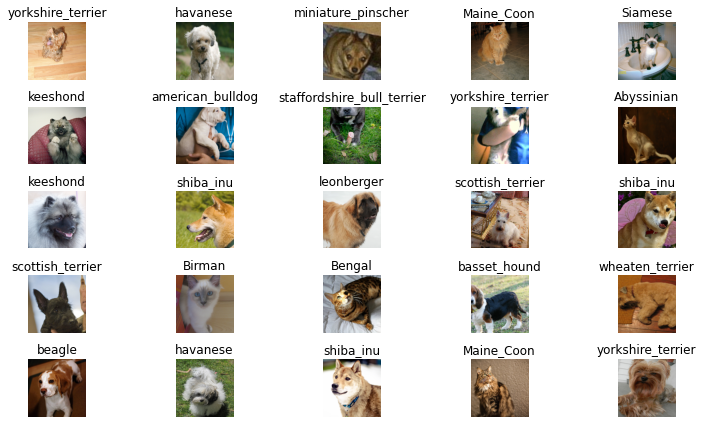

In [ ]:
data.show_batch(rows=5, figsize=(10,6))

In [ ]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.394626,0.320458,0.102842,01:21
1,0.611040,0.300139,0.096752,01:21
2,0.380697,0.269462,0.085927,01:22
3,0.286432,0.255154,0.081867,01:22


In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

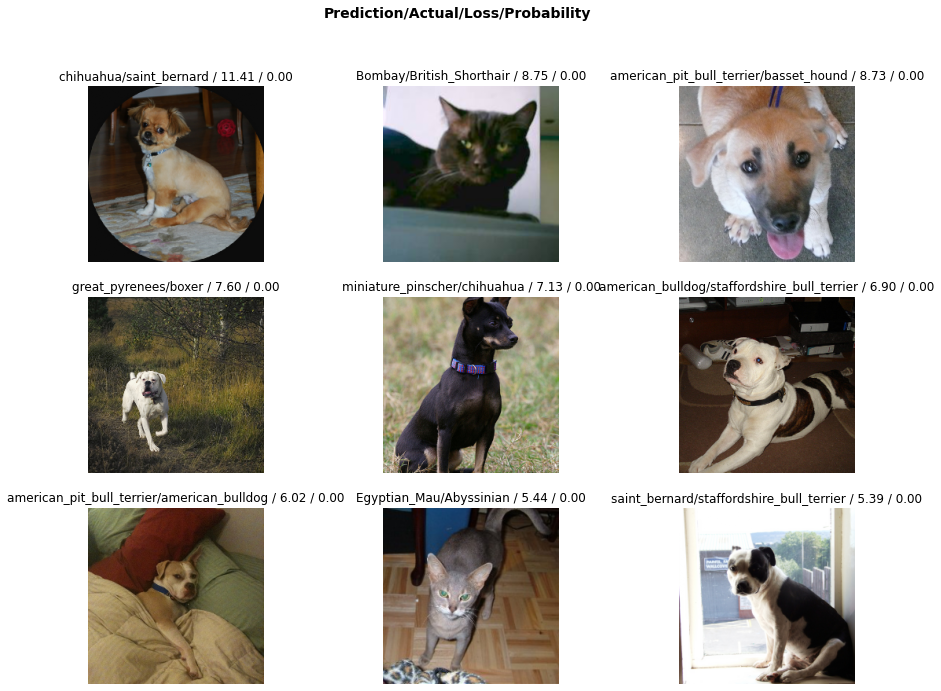

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

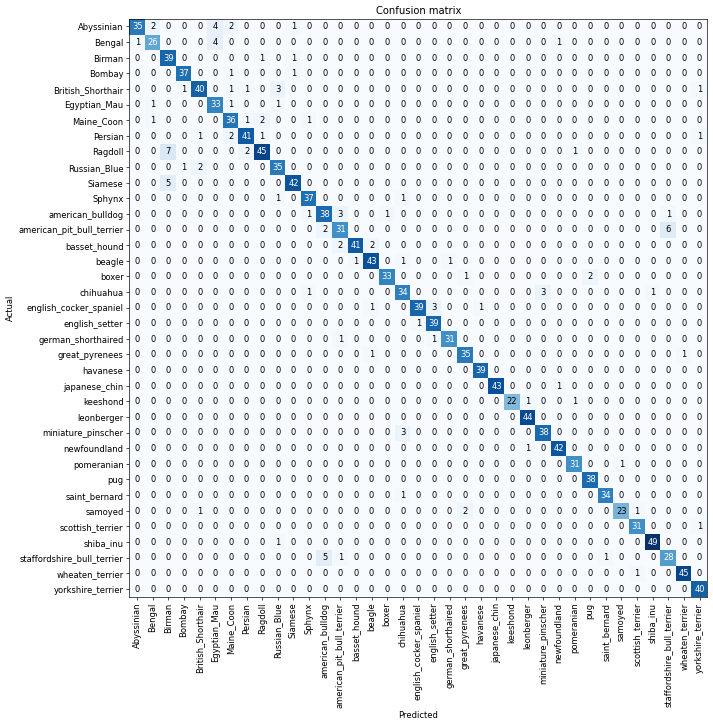

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Siamese', 'Birman', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('Abyssinian', 'Egyptian_Mau', 4),
 ('Bengal', 'Egyptian_Mau', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Abyssinian', 'Maine_Coon', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('basset_hound', 'american_pit_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'pug', 2),
 ('samoyed', 'great_pyrenees', 2)]

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.689063,0.390024,0.112991,01:24


In [ ]:
learn.load('stage-1');

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


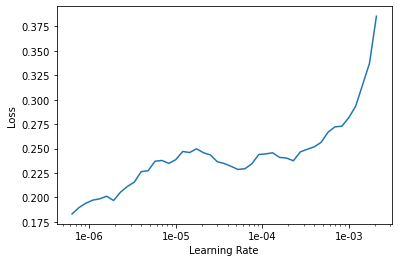

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.244935,0.245392,0.078484,01:25
1,0.200089,0.238602,0.076455,01:25


In [ ]:
data = ImageDataBunch.from_name_re('images', fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


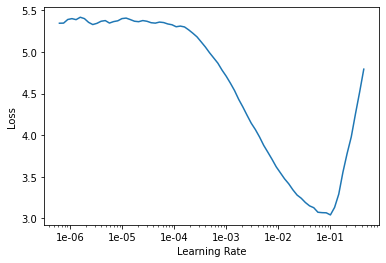

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.728521,0.271551,0.079838,02:11
1,0.474897,0.312028,0.090663,02:09
2,0.458513,0.280036,0.085927,02:10
3,0.338708,0.243713,0.075101,02:11
4,0.278173,0.252219,0.066306,02:11
5,0.166795,0.176051,0.053451,02:10
6,0.122138,0.167563,0.049391,02:11
7,0.107274,0.161203,0.050744,02:12


In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.104849,0.176364,0.052774,02:21
1,0.092875,0.158872,0.043302,02:21
2,0.079038,0.165802,0.048038,02:22


In [ ]:
learn.load('stage-1-50');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 8),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('beagle', 'basset_hound', 4),
 ('Birman', 'Siamese', 3),
 ('Ragdoll', 'Persian', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Ragdoll', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('boxer', 'american_bulldog', 2)]